関数old_nezumi_fractalでの602248!の計算時間は5.3550474643707275でした


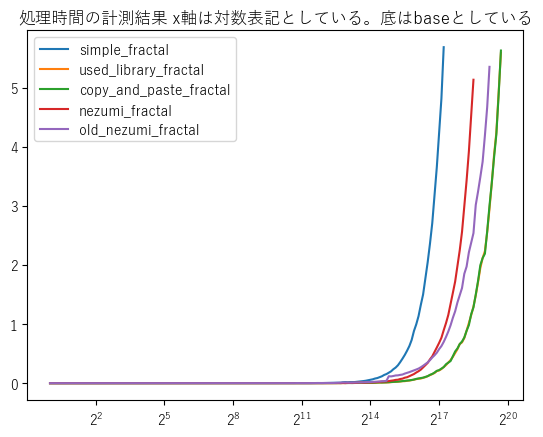

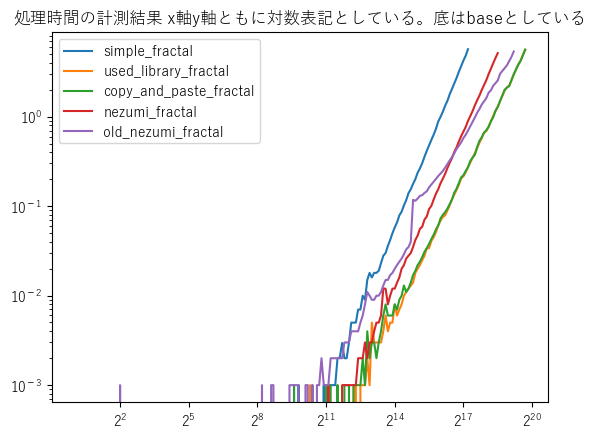

In [1]:

"""
色々なアルゴリズムでの階乗計算
"""

import math
import time
import inspect
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Any
from IPython.display import clear_output
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif' #日本語フォントの設定らしい。（ネットのコピペ）
rcParams['font.sans-serif'] = [
    'Hiragino Maru Gothic Pro', 
    'Yu Gothic', 
    'Meirio', 
    'Takao', 
    'IPAexGothic', 
    'IPAPGothic', 
    'VL PGothic', 
    'Noto Sans CJK JP'
]

import fractal_funcs as frac #今回の階乗関数モジュール

def get_function_name(function:Callable) -> str: #酷い実装だが、許して
    """関数の名前を取得する
    """
    for name, obj in inspect.getmembers(frac):
        if obj == function:
            return name

def timeit_execution(func:Callable[[Any,], Any]) -> float:
    """関数の実行時間を調べる関数です
    """
    start_time = time.time()
    func()
    return time.time()-start_time

fractal_funcs = (
    frac.simple_fractal,
    frac.used_library_fractal,
    frac.copy_and_paste_fractal,
    frac.nezumi_fractal,
    frac.old_nezumi_fractal,
)

base = 2
power = 50 #base**ten_power を計測する最大のnの大きさとする
step = 0.1 #最大値のn (base**ten_power)までどのくらいの刻みで増やしていくかの数
           #10**step倍づつ増えていく。
over_time = 5 #計算にover_time以上の時間がかかったばあい、それ以上nを増やしての計測を修了とする
number_of_repetitions = base ** np.arange(0, power+step, step, dtype=float) #計算するnを先に生成しておく。

result = {get_function_name(func): [] for func in fractal_funcs} #計測結果を代入するリストを作成

for func in fractal_funcs:
    ten_second_over_flag = False
    for n in number_of_repetitions:
        if ten_second_over_flag:
            continue

        execution_func = lambda : func(int(n)) #実際に実行する関数を作る
                                          #(具体的にはnの階乗を計算する引数なしの関数へとラッピングする)
        execution_time = timeit_execution(execution_func) #実行
        
        result[get_function_name(func)].append(execution_time)
        if execution_time > over_time:
            ten_second_over_flag = True
        
        clear_output(True)
        print("関数{}での{}!の計算時間は{}でした".format(
            get_function_name(func), int(n), execution_time))

#プロット
fig1 = plt.figure()
fig2 = plt.figure()

ax1 = fig1.subplots()
ax1.set_title("処理時間の計測結果 x軸は対数表記としている。底はbaseとしている")
ax2 = fig2.subplots()
ax2.set_title("処理時間の計測結果 x軸y軸ともに対数表記としている。底はbaseとしている")

for func_name, value in result.items():
    ax1.plot(number_of_repetitions[:len(value)], value, label=func_name)
    ax2.plot(number_of_repetitions[:len(value)], value, label=func_name)

ax1.set_xscale("log", base=base)
ax2.set_xscale("log", base=base)
ax2.set_yscale("log")#, base=base)

ax1.legend()
ax2.legend()

plt.show()

In [23]:
import fractal_funcs as frac

print(frac.simple_fractal(10000))
print(frac.used_library_fractal(10000))
print(frac.copy_and_paste_fractal(10000))
print(frac.nezumi_fractal(10000))
print(frac.old_nezumi_fractal(10000))

2846259680917054518906413212119868890148051401702799230794179994274411340003764443772990786757784775815884062142317528830042339940153518739052421161382716174819824199827592418289259787898124253120594659962598670656016157203603239792632873671705574197596209947972034615369811989709261127750048419884541047554464244213657330307670362882580354896746111709736957860367019107151273058728104115864056128116538532596842582599558468814643042558983664931705925171720427659740744613340005419405246230343686915405940406622782824837151203832217864462718382292389963899282722187970245938769380309462733229257055545969002787528224254434802112755901916942542902891690721909708369053987374745248337289952180236328274121704026808676921045155584056717255537201585213282903427998981844931361064038148930449962159999935967089298019033699848440466541923625842494716317896119204123310826865107135451684554093603300960721034694437798234943078062606942230268188522759205702923084312618849760656074258627944882715595683153344